In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [10]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [12]:
df = pd.concat([X, y], axis=1)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
df.describe()

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


ANÁLISIS DE VALORES FALTANTES
       Columna  Valores_Faltantes  Porcentaje
    occupation                966        1.98
     workclass                963        1.97
native-country                274        0.56


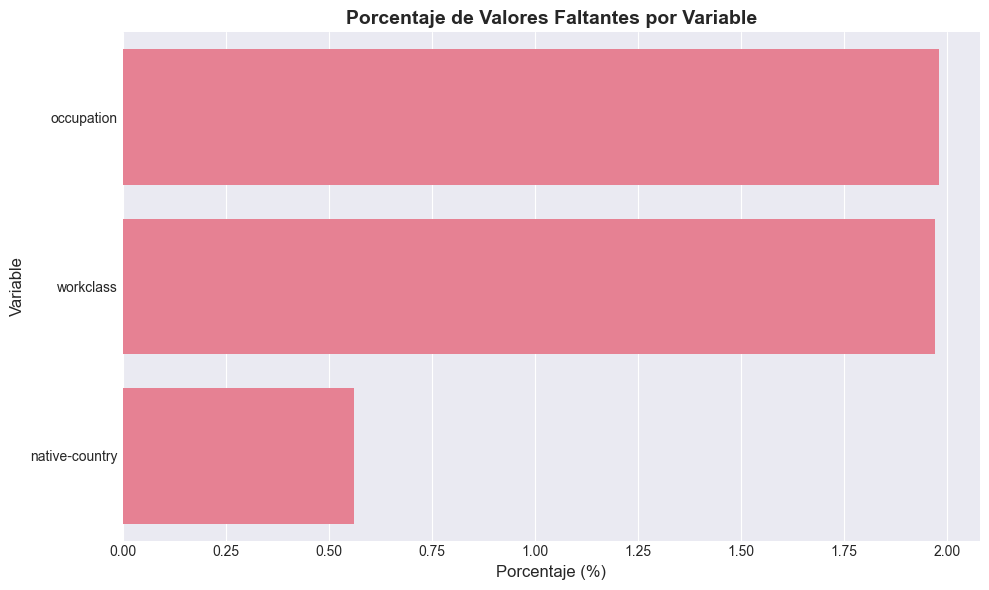

In [13]:
print("ANÁLISIS DE VALORES FALTANTES")
missing = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Faltantes': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Valores_Faltantes'] > 0].sort_values('Valores_Faltantes', ascending=False)

if len(missing) > 0:
    print(missing.to_string(index=False))
else:
    print("No hay valores faltantes en el dataset")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
if len(missing) > 0:
    sns.barplot(data=missing, x='Porcentaje', y='Columna', ax=ax)
    ax.set_title('Porcentaje de Valores Faltantes por Variable', fontsize=14, fontweight='bold')
    ax.set_xlabel('Porcentaje (%)', fontsize=12)
    ax.set_ylabel('Variable', fontsize=12)
else:
    ax.text(0.5, 0.5, 'No hay valores faltantes', 
            ha='center', va='center', fontsize=16, transform=ax.transAxes)
    ax.axis('off')
plt.tight_layout()
plt.show()


DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (INCOME)

Conteo:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Porcentajes:
income
<=50K     50.61
<=50K.    25.46
>50K      16.05
>50K.      7.87
Name: proportion, dtype: float64


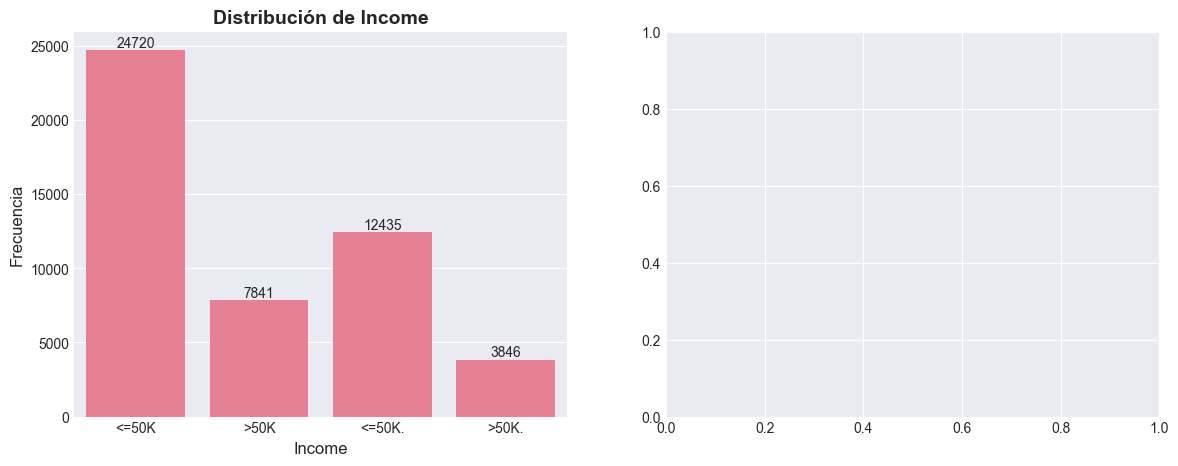

In [14]:
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (INCOME)")

income_counts = df['income'].value_counts()
income_pct = df['income'].value_counts(normalize=True) * 100

print("\nConteo:")
print(income_counts)
print("\nPorcentajes:")
print(income_pct.round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
sns.countplot(data=df, x='income', ax=axes[0])
axes[0].set_title('Distribución de Income', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Income', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

BOX PLOTS - DETECCIÓN DE OUTLIERS


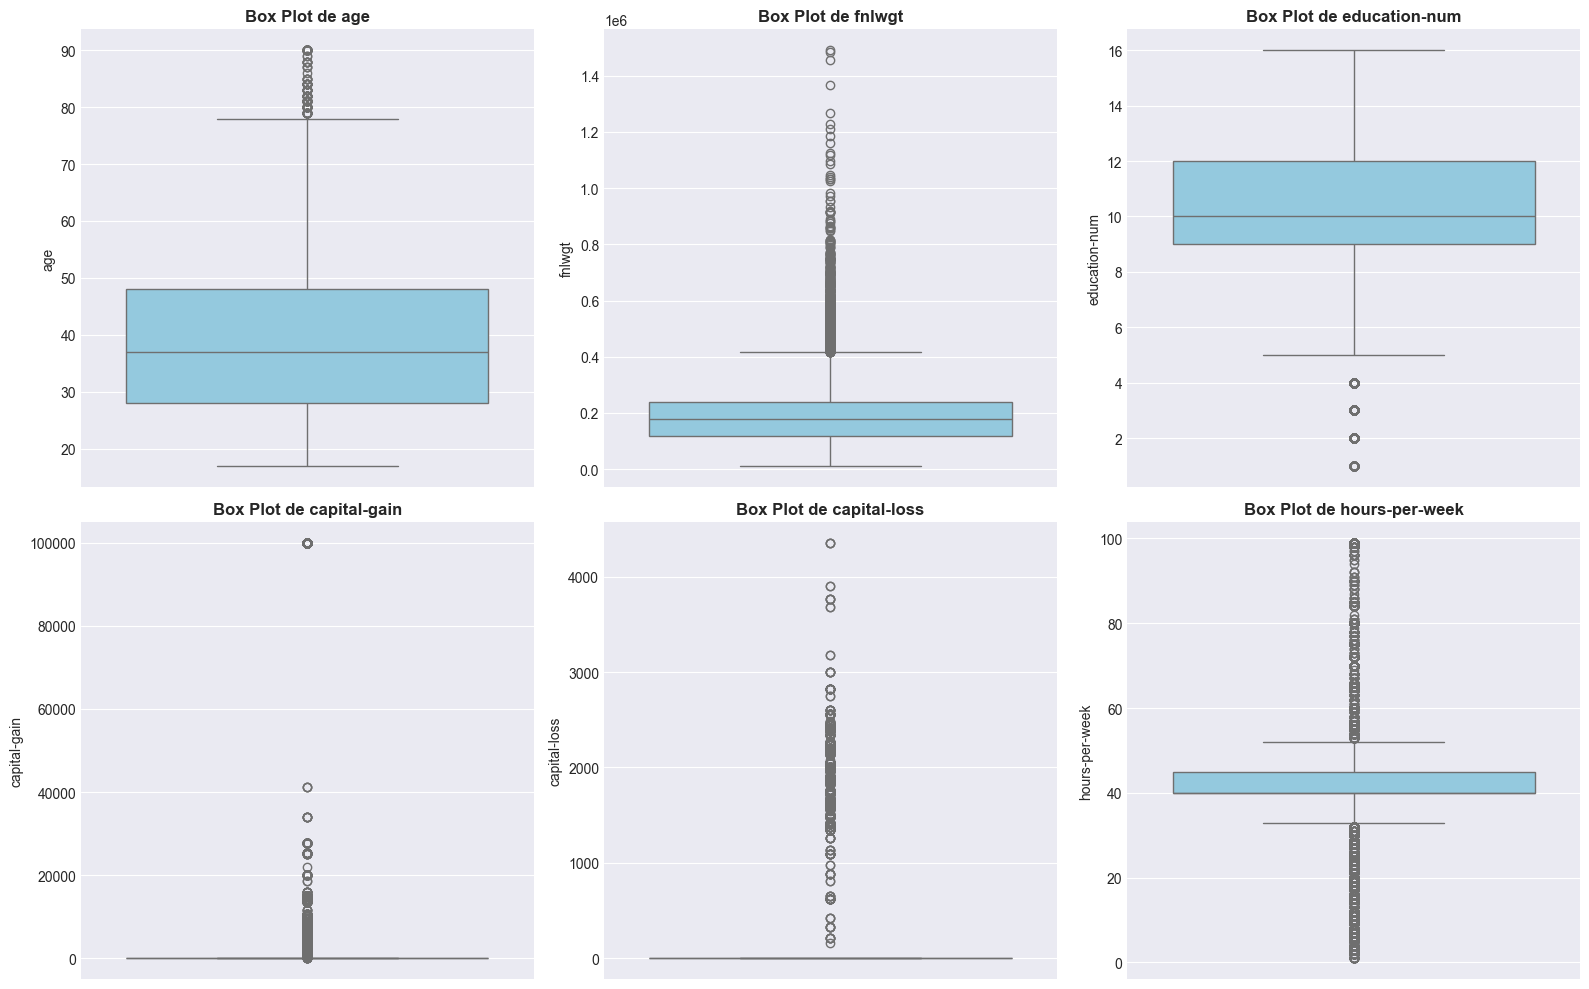

In [16]:
print("BOX PLOTS - DETECCIÓN DE OUTLIERS")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 
                'capital-loss', 'hours-per-week']

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot de {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS


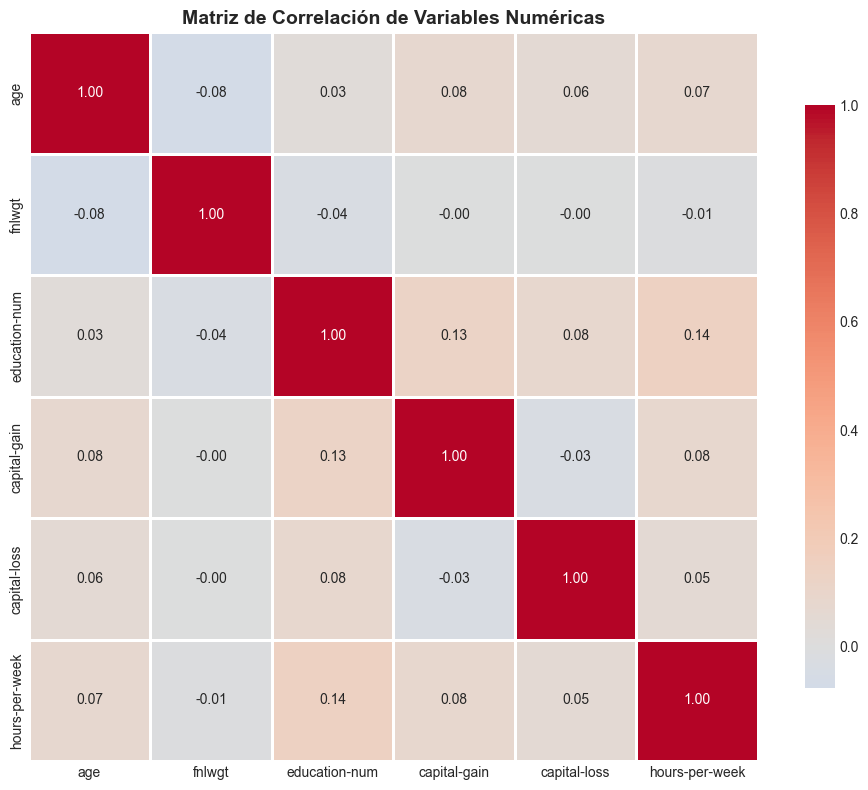


Correlaciones más fuertes:
hours-per-week  education-num     0.143689
education-num   hours-per-week    0.143689
                capital-gain      0.125146
capital-gain    education-num     0.125146
                hours-per-week    0.082157
hours-per-week  capital-gain      0.082157
capital-loss    education-num     0.080972
education-num   capital-loss      0.080972
age             capital-gain      0.077229
capital-gain    age               0.077229
dtype: float64


In [17]:
print("MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS")

correlation_matrix = df[numeric_cols].corr()

# Visualización
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax, cbar_kws={"shrink": 0.8})
ax.set_title('Matriz de Correlación de Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelaciones más fuertes:")
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1].sort_values(ascending=False)
print(corr_pairs.head(10))


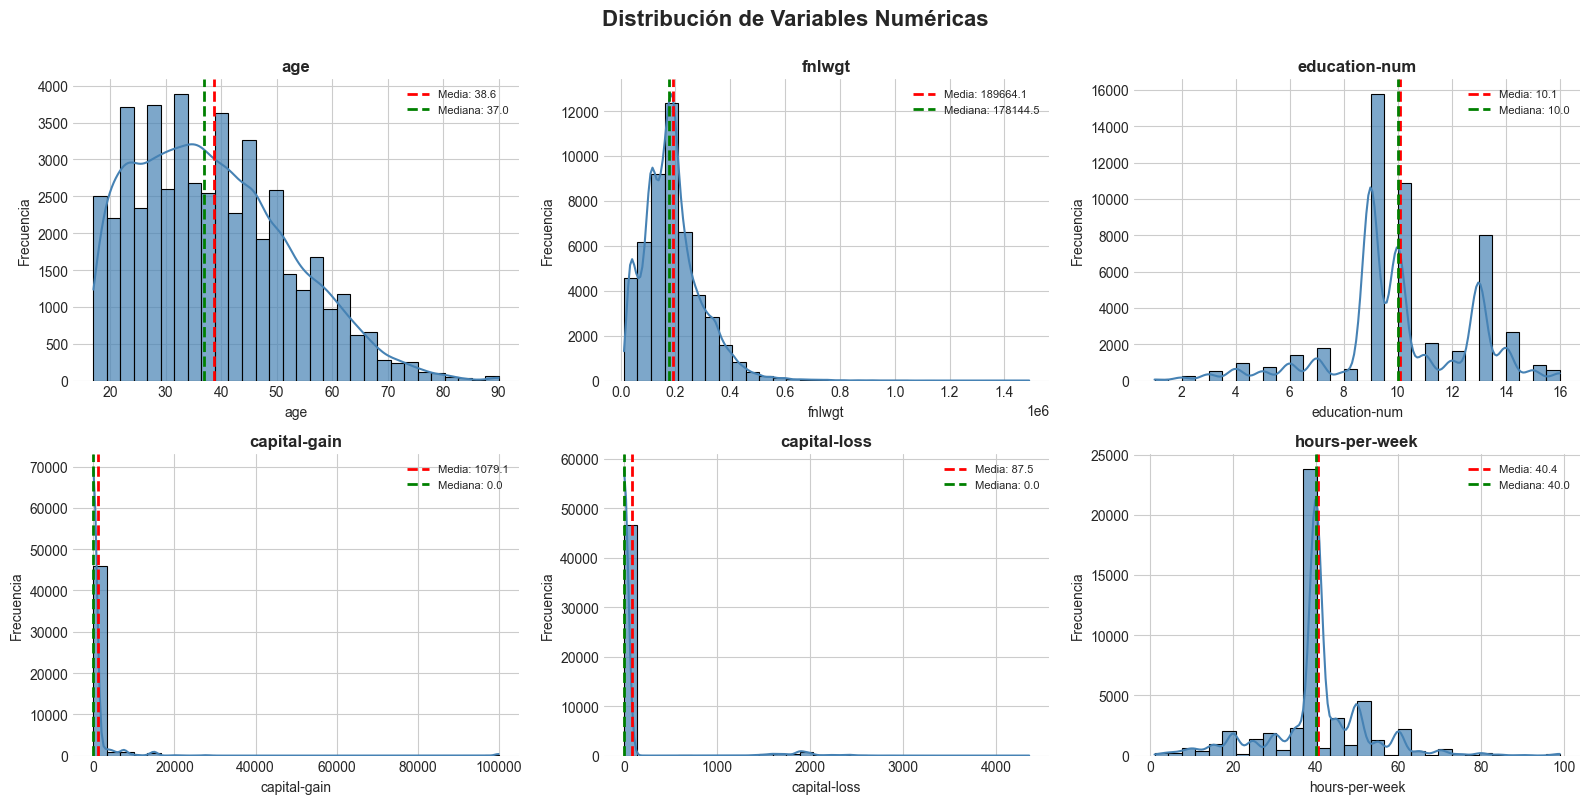

Variables numéricas analizadas: 6
Columnas: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [18]:
# Configurar estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calcular número de filas y columnas para subplots
n_cols = len(numeric_cols)
n_rows = int(np.ceil(n_cols / 3))  # 3 gráficos por fila
n_cols_plot = min(3, n_cols)  # Máximo 3 columnas

# Crear figura con subplots
fig, axes = plt.subplots(n_rows, n_cols_plot, figsize=(16, 4*n_rows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold', y=1.00)

# Aplanar axes para facilitar iteración
if n_cols > 1:
    axes = axes.flatten() if n_cols > n_cols_plot else [axes]
else:
    axes = [axes]

# Crear histograma con seaborn para cada variable numérica
for i, col in enumerate(numeric_cols):
    # Histograma con KDE (curva de densidad)
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], 
                 color='steelblue', edgecolor='black', alpha=0.7)
    
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)
    
    # Agregar líneas de media y mediana
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                    label=f'Media: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, 
                    label=f'Mediana: {median_val:.1f}')
    axes[i].legend(fontsize=8, loc='upper right')

# Ocultar subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

print(f"Variables numéricas analizadas: {len(numeric_cols)}")
print(f"Columnas: {numeric_cols}")